In [ ]:
%load_ext autoreload
%autoreload 2

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from math import ceil
from CIoTS import *
import time

In [13]:
max_ps = list(range(4, 9, 2))
test_ps = list(range(2, 11, 2))
runs = 20
dimensions = 4
data_length = 10000
alpha = 0.05

In [14]:
f1_scores = pd.DataFrame(columns=['true_p', 'p', 'mean_f1', 'std_f1'])
runtimes = pd.DataFrame(columns=['true_p', 'p', 'mean_time', 'std_time'])

In [15]:
for p in max_ps:
    incoming_edges = 3 #max(ceil(dimensions*p/3), 1)
    
    f1 = {p_test: [] for p_test in test_ps}
    runtime = {p_test: [] for p_test in test_ps}
    
    for run in range(runs):
        generator = CausalTSGenerator(dimensions=dimensions, max_p=p, data_length=data_length, incoming_edges=incoming_edges)
        ts = generator.generate()
            
        for p_test in test_ps:
            start_time = time.time()
            predicted_graph = pc_chen(partial_corr_test, ts, p_test, alpha)
            exec_time = time.time()-start_time
            
            f1[p_test].append(evaluate_edges(generator.graph, predicted_graph)['f1-score'])
            runtime[p_test].append(exec_time)
            print('done: p='+ str(p) + ' run='+str(run+1) + ' p_test='+str(p_test) + ' exec_time='+str(exec_time))
    
    for p_test in test_ps:
        f1_scores = f1_scores.append({'true_p': p, 'p': p_test, 'mean_f1': np.mean(f1[p_test]),
                                      'std_f1': np.std(f1[p_test])}, ignore_index=True)
        runtimes = runtimes.append({'true_p': p, 'p': p_test, 'mean_time': np.mean(runtime[p_test]),
                                    'std_time': np.std(runtime[p_test])}, ignore_index=True)

done: p=4 run=1 p_test=2 exec_time=3.8553874492645264
done: p=4 run=1 p_test=4 exec_time=21.73862886428833
done: p=4 run=1 p_test=6 exec_time=70.96734261512756
done: p=4 run=1 p_test=8 exec_time=206.01968455314636
done: p=4 run=1 p_test=10 exec_time=466.2335915565491
done: p=4 run=2 p_test=2 exec_time=5.0397419929504395
done: p=4 run=2 p_test=4 exec_time=22.5273277759552
done: p=4 run=2 p_test=6 exec_time=88.88311791419983
done: p=4 run=2 p_test=8 exec_time=217.62510752677917
done: p=4 run=2 p_test=10 exec_time=375.1414761543274
done: p=4 run=3 p_test=2 exec_time=4.475729465484619
done: p=4 run=3 p_test=4 exec_time=22.636247634887695
done: p=4 run=3 p_test=6 exec_time=75.69964838027954
done: p=4 run=3 p_test=8 exec_time=216.31004762649536
done: p=4 run=3 p_test=10 exec_time=403.13480281829834
done: p=4 run=4 p_test=2 exec_time=4.38765287399292
done: p=4 run=4 p_test=4 exec_time=23.045542001724243
done: p=4 run=4 p_test=6 exec_time=79.35905241966248
done: p=4 run=4 p_test=8 exec_time=24

done: p=6 run=11 p_test=6 exec_time=72.73436617851257
done: p=6 run=11 p_test=8 exec_time=185.5993115901947
done: p=6 run=11 p_test=10 exec_time=332.3802626132965
done: p=6 run=12 p_test=2 exec_time=3.759352922439575
done: p=6 run=12 p_test=4 exec_time=20.902780532836914
done: p=6 run=12 p_test=6 exec_time=64.4818332195282
done: p=6 run=12 p_test=8 exec_time=185.4606282711029
done: p=6 run=12 p_test=10 exec_time=337.8401708602905
done: p=6 run=13 p_test=2 exec_time=3.3072330951690674
done: p=6 run=13 p_test=4 exec_time=19.64237141609192
done: p=6 run=13 p_test=6 exec_time=64.87536144256592
done: p=6 run=13 p_test=8 exec_time=159.45755577087402
done: p=6 run=13 p_test=10 exec_time=334.3707811832428
done: p=6 run=14 p_test=2 exec_time=3.240774154663086
done: p=6 run=14 p_test=4 exec_time=19.490523099899292
done: p=6 run=14 p_test=6 exec_time=60.49470400810242
done: p=6 run=14 p_test=8 exec_time=155.8060040473938
done: p=6 run=14 p_test=10 exec_time=317.55487537384033
done: p=6 run=15 p_t

In [16]:
f1_scores

,true_p,p,mean_f1,std_f1
0,4.0,2.0,0.282837,0.063149
1,4.0,4.0,0.505497,0.095309
2,4.0,6.0,0.469910,0.130108
3,4.0,8.0,0.442572,0.092507
4,4.0,10.0,0.433168,0.082288
5,6.0,2.0,0.227398,0.070338
6,6.0,4.0,0.332804,0.102621
7,6.0,6.0,0.532082,0.136648
8,6.0,8.0,0.482378,0.146854
9,6.0,10.0,0.482815,0.152552


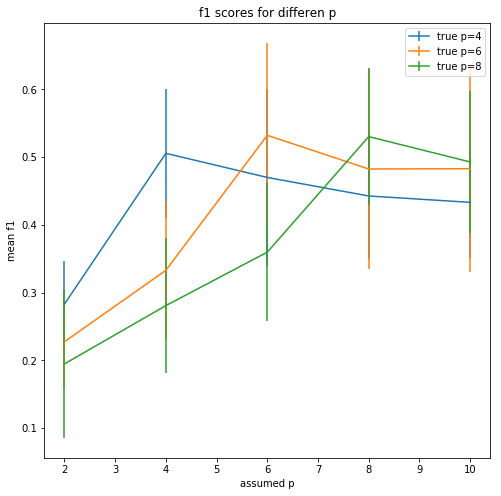

In [17]:
plt.figure(figsize=(8,8))
plt.title('f1 scores for differen p')
plt.xlabel('assumed p')
plt.ylabel('mean f1')
handles = []
labels = []
for p in max_ps:
    plt.errorbar(x=f1_scores.loc[f1_scores['true_p']==p, 'p'],
                 y=f1_scores.loc[f1_scores['true_p']==p, 'mean_f1'],
                 yerr=f1_scores.loc[f1_scores['true_p']==p, 'std_f1'],
                 label='true p='+str(p))
plt.legend()
plt.show()

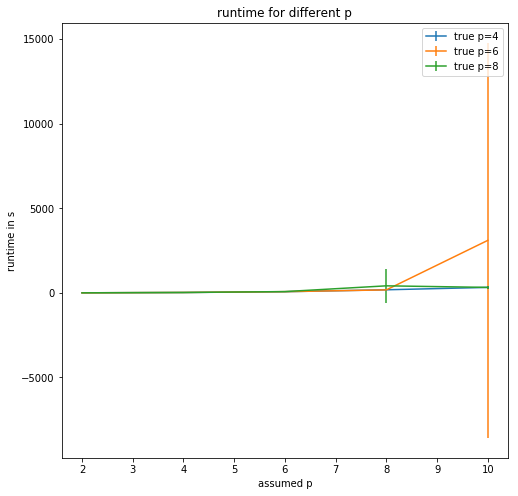

In [18]:
plt.figure(figsize=(8,8))
plt.title('runtime for different p')
plt.xlabel('assumed p')
plt.ylabel('runtime in s')
handles = []
labels = []
for p in max_ps:
    plt.errorbar(x=runtimes.loc[runtimes['true_p']==p, 'p'],
                 y=runtimes.loc[runtimes['true_p']==p, 'mean_time'],
                 yerr=runtimes.loc[runtimes['true_p']==p, 'std_time'],
                 label='true p='+str(p))
plt.legend()
plt.show()